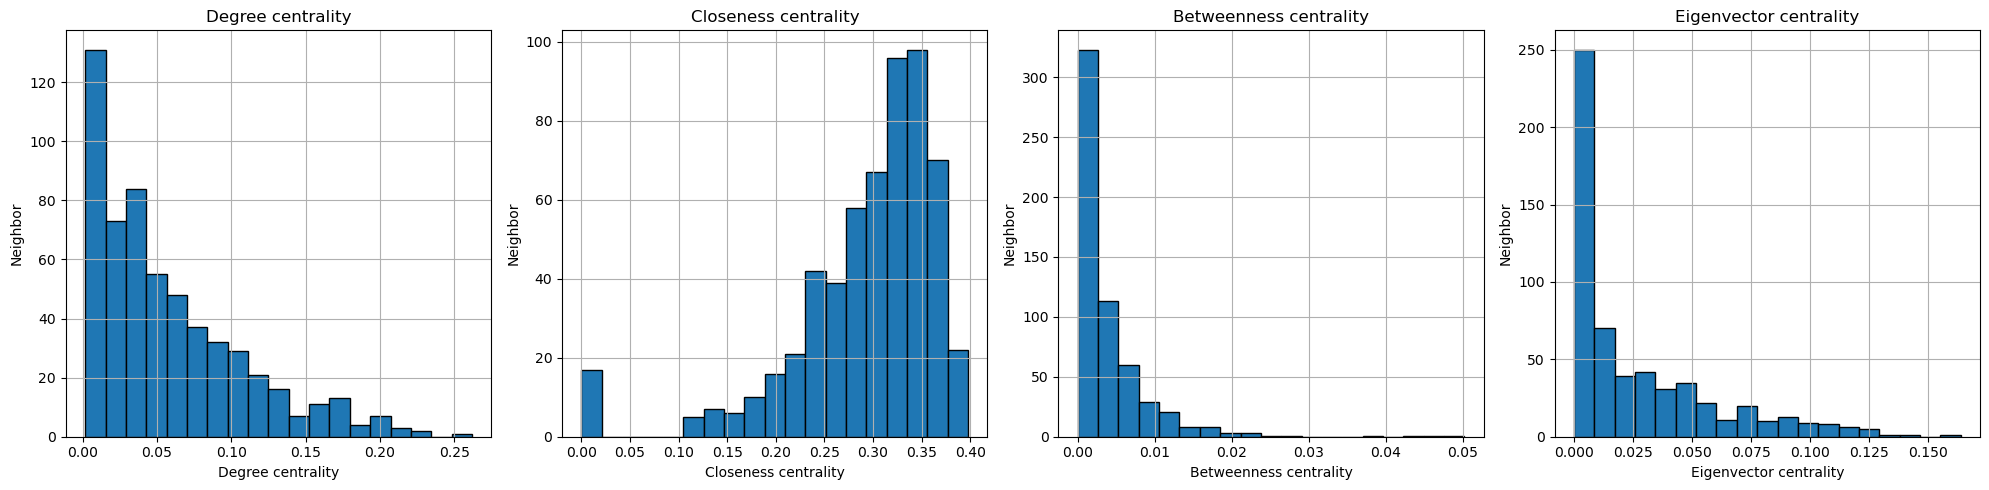

In [15]:
##### import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
graph_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
graph = nx.read_gml(graph_path)
degree_centrality = nx.degree_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
eigenvector_centrality = nx.eigenvector_centrality(graph)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
centrality_data1 = [
    (degree_centrality, "Degree centrality"),
    (closeness_centrality, "Closeness centrality"),
    (betweenness_centrality, "Betweenness centrality"),
    (eigenvector_centrality, "Eigenvector centrality")
]

for i, (cen_values1, title1) in enumerate(centrality_data1):
    values = list(cen_values1.values())
    axes[i].hist(values, bins=np.linspace(min(values), max(values), 20), edgecolor='black')
    axes[i].set_title(title1)
    axes[i].set_xlabel(f"{title1}")
    axes[i].set_ylabel("Neighbor")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

1. Degree Centrality
2. Closeness Centrality
3. Betweenness Centrality
4. Eigenvector Centrality

In [9]:
import networkx as nx
import pandas as pd

file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
graph = nx.read_gml(file_path)

# Analyze the structure of the graph
graph_info = {
    "Number of Nodes": graph.number_of_nodes(),
    "Number of Edges": graph.number_of_edges(),
    "Graph Type": type(graph)
}

# Calculate centrality measures
degree_centrality = nx.degree_centrality(graph)
pagerank = nx.pagerank(graph)

# Extract the top 10 nodes for Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the top 10 nodes for PageRank
top_10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# Combine Degree Centrality and PageRank results into a comparison table
degree_top_nodes = [node for node, _ in top_10_degree]
pagerank_top_nodes = [node for node, _ in top_10_pagerank]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Rank": list(range(1, 11)),
    "Top 10 by Degree Centrality": degree_top_nodes,
    "Top 10 by PageRank": pagerank_top_nodes
})

# Display the comparison table to the user
comparison_df.to_csv("comparison_table.csv", index=False)
print(comparison_df)



   Rank   Top 10 by Degree Centrality          Top 10 by PageRank
0     1             Clark St & Elm St           Clark St & Elm St
1     2     Desplaines St & Kinzie St   Wabash Ave & Roosevelt Rd
2     3         Dearborn St & Erie St   Desplaines St & Kinzie St
3     4   Dearborn Pkwy & Delaware Pl       Kimbark Ave & 53rd St
4     5        Wabash Ave & Grand Ave       Dearborn St & Erie St
5     6        Clark St & Schiller St      Wabash Ave & Grand Ave
6     7     Wabash Ave & Roosevelt Rd  Indiana Ave & Roosevelt Rd
7     8       Clark St & Armitage Ave        Broadway & Barry Ave
8     9  Sheffield Ave & Waveland Ave     Wentworth Ave & 63rd St
9    10      Wells St & Evergreen Ave    Wilton Ave & Belmont Ave


1. Clark St & Elm St
2. Wabash Ave & Roosevelt Rd
3. Desplaines St & Kinzie St
4. Dearborn St & Erie St
5. Wabash Ave & Grand Ave

C:\Users\NICK\AppData\Local\Temp\ipykernel_82652\361047483.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(top_10_nodes))


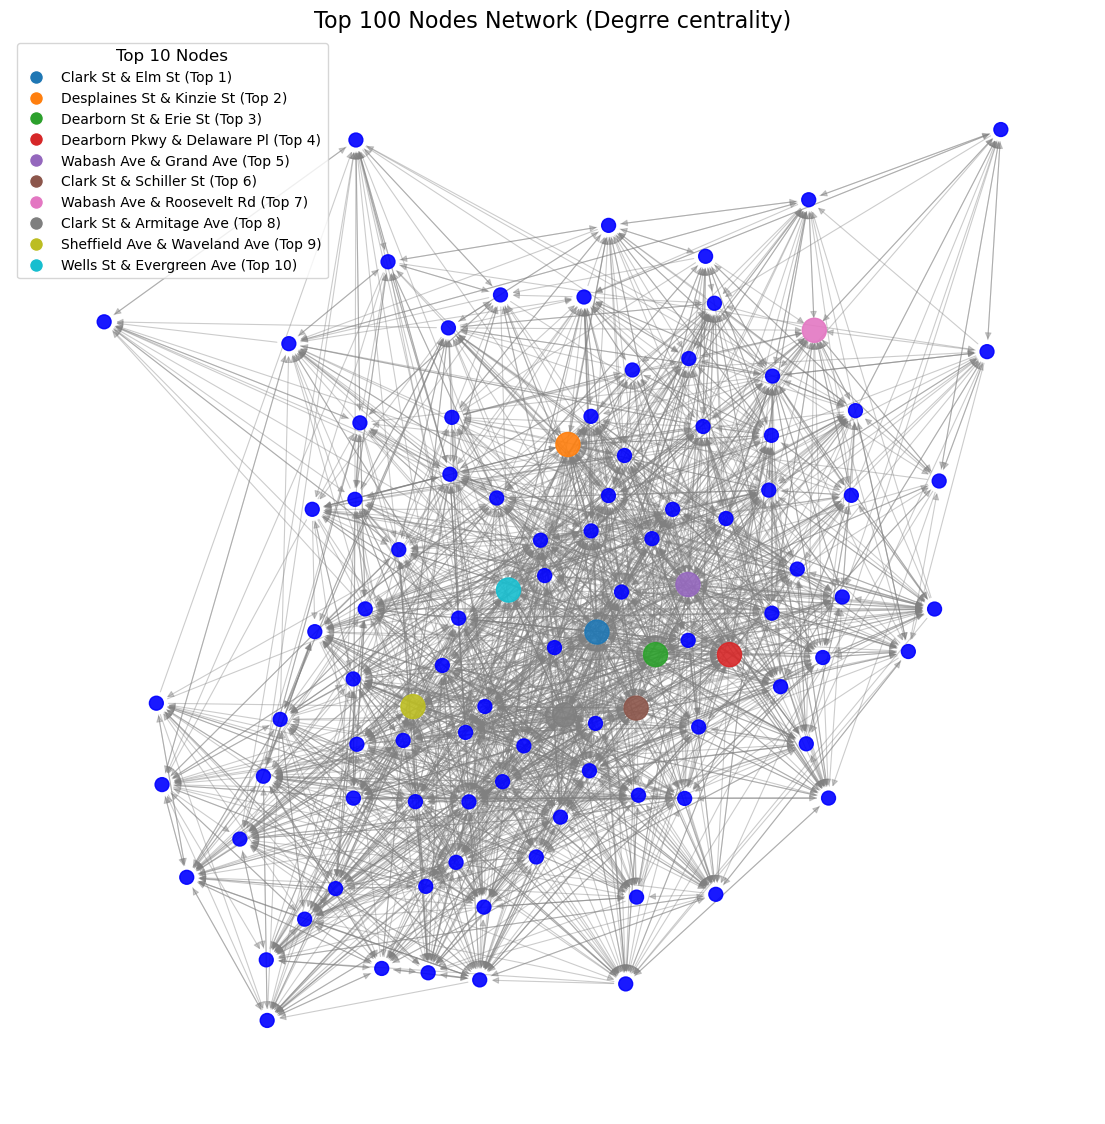

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
G_no_self_loops = G.copy()
G_no_self_loops.remove_edges_from(nx.selfloop_edges(G_no_self_loops))
degree_centrality = nx.degree_centrality(G_no_self_loops)
top_100_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:100]
top_100_subgraph_no_loops = G_no_self_loops.subgraph(top_100_nodes)
top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
color_map = cm.get_cmap('tab10', len(top_10_nodes))
top_10_colors = {node: color_map(i) for i, node in enumerate(top_10_nodes)}

node_colors = []
node_sizes = []
for node in top_100_subgraph_no_loops.nodes():
    if node in top_10_nodes:
        node_colors.append(top_10_colors[node])  
        node_sizes.append(300)  
    else:
        node_colors.append('blue')  
        node_sizes.append(100)  
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(top_100_subgraph_no_loops, seed=42)  # Consistent layout
nx.draw_networkx_nodes(top_100_subgraph_no_loops, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(top_100_subgraph_no_loops, pos, alpha=0.4, edge_color='gray', width=0.8)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=top_10_colors[node], markersize=10, label=f"{node} (Top {i+1})")
    for i, node in enumerate(top_10_nodes)
]
plt.legend(handles=legend_elements, loc='upper left', title='Top 10 Nodes', fontsize=10, title_fontsize=12)
plt.title("Top 100 Nodes Network (Degrre centrality)", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()



C:\Users\NICK\AppData\Local\Temp\ipykernel_82652\2913662325.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(top_10_nodes))


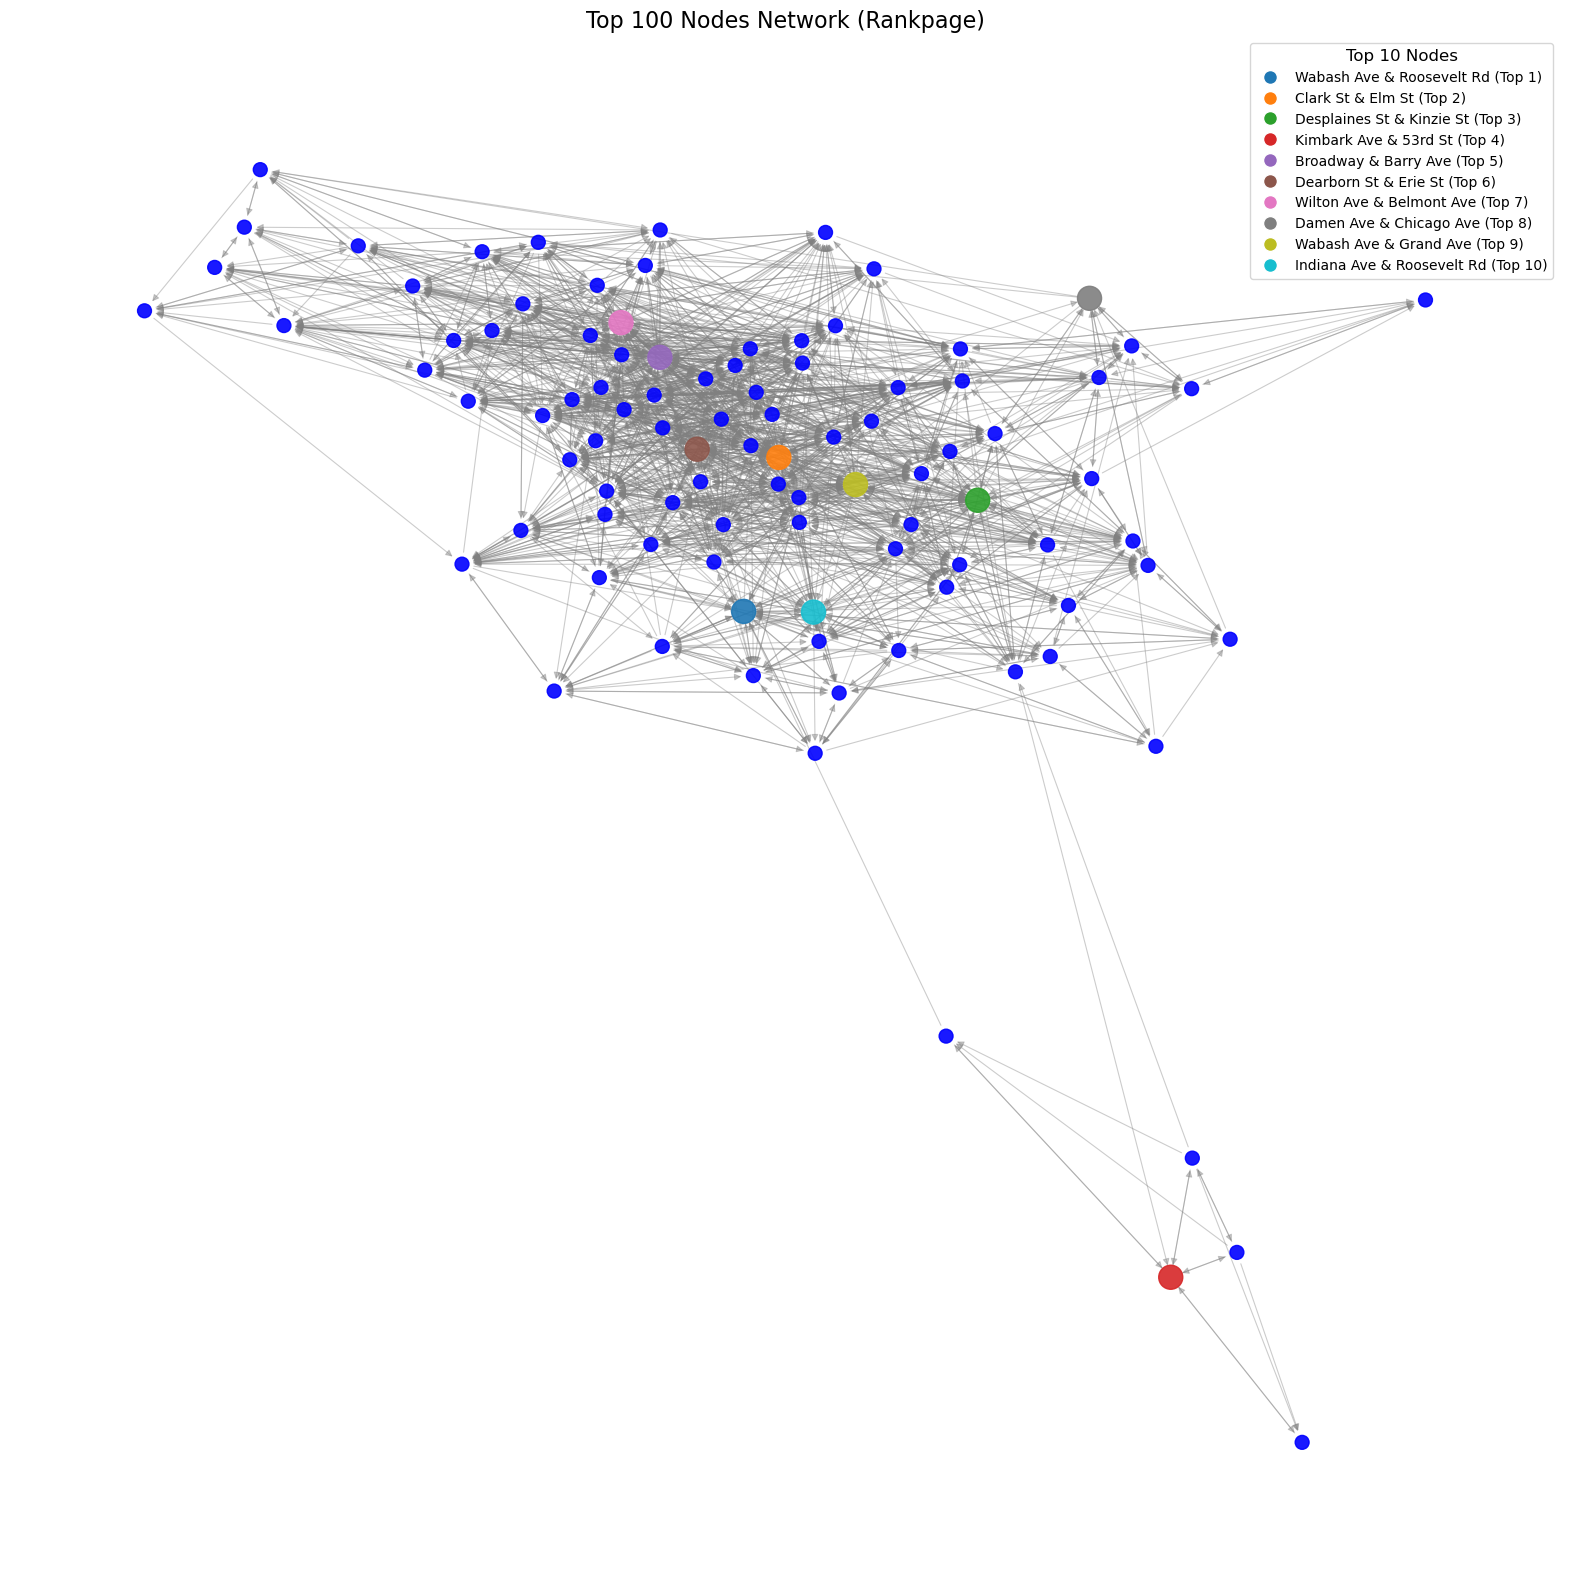

In [87]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Load the graph from file
file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)

# Remove self-loops
G_no_self_loops = G.copy()
G_no_self_loops.remove_edges_from(nx.selfloop_edges(G_no_self_loops))

# Compute all pairs shortest path lengths and find the farthest nodes
all_pairs_shortest_path = dict(nx.all_pairs_shortest_path_length(G_no_self_loops))
max_distance = 0
farthest_nodes = (None, None)
for node1, paths in all_pairs_shortest_path.items():
    for node2, distance in paths.items():
        if distance > max_distance:
            max_distance = distance
            farthest_nodes = (node1, node2)

# Remove the farthest nodes
G_no_self_loops.remove_nodes_from(farthest_nodes)

# Compute PageRank centrality and identify the top 100 nodes
pagerank_centrality = nx.pagerank(G_no_self_loops)
top_100_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:100]

# Create a subgraph of the top 100 nodes
top_100_subgraph_mutable = G_no_self_loops.subgraph(top_100_nodes).copy()

# Calculate positions using spring layout
pos = nx.spring_layout(top_100_subgraph_mutable, seed=42)

# Identify the two nodes in the upper-right corner
x_coords = [pos[node][0] for node in pos]
y_coords = [pos[node][1] for node in pos]
threshold_x_upper = np.percentile(x_coords, 95)  # Upper 5% x-coordinate
threshold_y_upper = np.percentile(y_coords, 95)  # Upper 5% y-coordinate
upper_right_nodes = [
    node for node in pos if pos[node][0] > threshold_x_upper and pos[node][1] > threshold_y_upper
]

# Remove the two nodes in the upper-right corner (if there are at least two)
if len(upper_right_nodes) >= 2:
    upper_right_nodes = sorted(upper_right_nodes, key=lambda n: (pos[n][0], pos[n][1]), reverse=True)[:2]
    top_100_subgraph_mutable.remove_nodes_from(upper_right_nodes)

# Recalculate positions after removing the upper-right nodes
pos = nx.spring_layout(top_100_subgraph_mutable, seed=42)

# Identify the top 10 nodes by PageRank
top_10_nodes = sorted(top_100_nodes, key=lambda x: pagerank_centrality[x], reverse=True)[:10]
color_map = cm.get_cmap('tab10', len(top_10_nodes))
top_10_colors = {node: color_map(i) for i, node in enumerate(top_10_nodes)}

# Set node colors and sizes
node_colors = []
node_sizes = []
for node in top_100_subgraph_mutable.nodes():
    if node in top_10_nodes:
        node_colors.append(top_10_colors.get(node, 'blue')) 
        node_sizes.append(300)
    else:
        node_colors.append('blue') 
        node_sizes.append(100)  

# Plot the updated graph
plt.figure(figsize=(20, 20))

nx.draw_networkx_nodes(top_100_subgraph_mutable, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(top_100_subgraph_mutable, pos, alpha=0.4, edge_color='gray', width=0.8)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=top_10_colors.get(node, 'blue'), markersize=10, label=f"{node} (Top {i+1})")
    for i, node in enumerate(top_10_nodes) if node in top_100_subgraph_mutable.nodes()
]
plt.legend(handles=legend_elements, loc='upper right', title='Top 10 Nodes', fontsize=10, title_fontsize=12)
plt.title("Top 100 Nodes Network (Rankpage)", fontsize=16)
plt.axis('off')
plt.show()







In [49]:
file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
edge_betweenness = nx.edge_betweenness_centrality(G)
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
top_central_paths = sorted_edges[:10]
top_central_paths

[(('Hoyne Ave & 47th St', 'Paulina St & 18th St'), 0.01896678648889296),
 (('Stony Island Ave & 71st St', 'Hoyne Ave & 47th St'), 0.017259242236230633),
 (('Green St & Randolph St', 'Kimbark Ave & 53rd St'), 0.015596036093750446),
 (('Ellis Ave & 53rd St', 'Green St & Randolph St'), 0.01427659727318934),
 (('Lake Park Ave & 56th St', 'Wabash Ave & Roosevelt Rd'),
  0.013787731001586808),
 (('Troy St & North Ave', 'Central Ave & Chicago Ave'), 0.012532608497363956),
 (('Stony Island Ave & 75th St', 'Stony Island Ave & 71st St'),
  0.01222243461719294),
 (('Central Ave & Lake St', 'Laramie Ave & Kinzie St'), 0.011673835670174744),
 (('Michigan Ave & 18th St', 'Ellis Ave & 53rd St'), 0.011634766297289427),
 (('Dorchester Ave & 63rd St', 'Stony Island Ave & 64th St'),
  0.01085732189759609)]

In [ ]:
关键路径指标

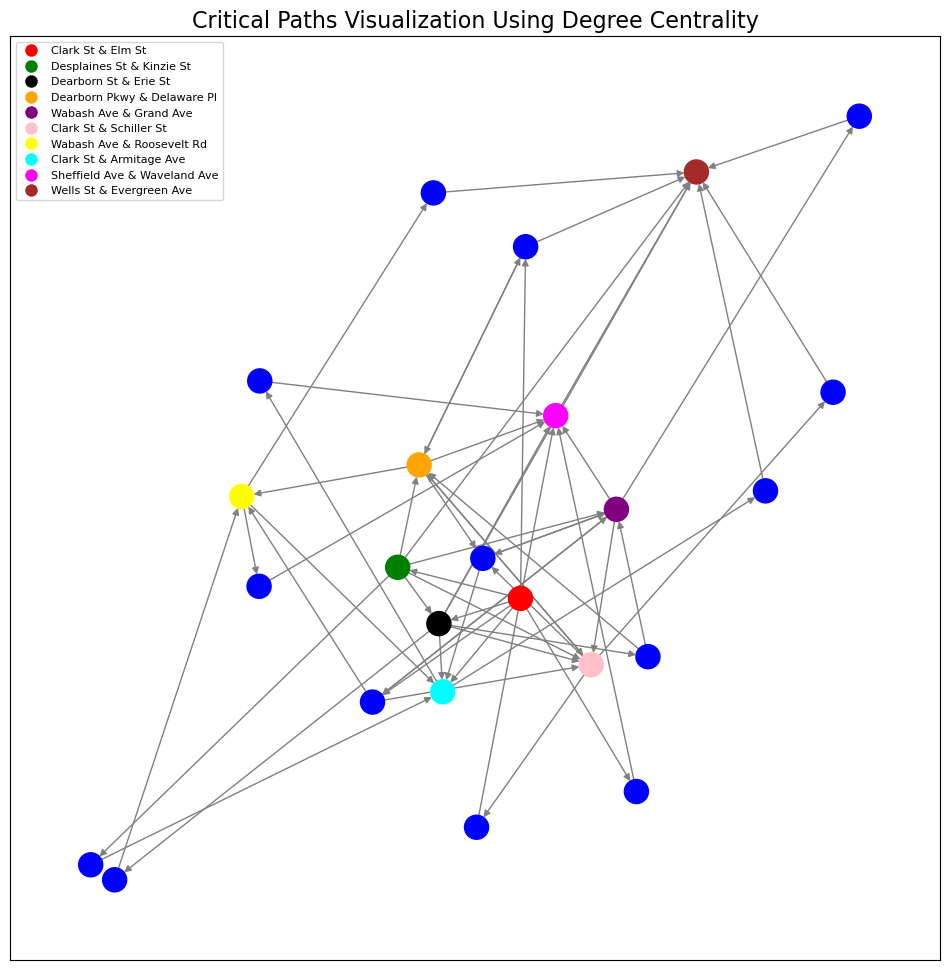

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the provided GML file
file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)

degree_centrality_scores = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality_scores.items(), key=lambda item: item[1], reverse=True)
top_degree_nodes = sorted_degree_centrality[:10]
critical_degree_paths = {}
for i, node1 in enumerate(top_degree_nodes):
    for node2 in top_degree_nodes[i+1:]:
        try:
            path = nx.shortest_path(G, source=node1[0], target=node2[0], weight='weight')
            path_length = nx.shortest_path_length(G, source=node1[0], target=node2[0], weight='weight')
            critical_degree_paths[(node1[0], node2[0])] = (path, path_length)
        except nx.NetworkXNoPath:
            critical_degree_paths[(node1[0], node2[0])] = None

critical_degree_paths_filtered = {k: v for k, v in critical_degree_paths.items() if v is not None}
degree_colors = ['red', 'green', 'black', 'orange', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'brown']
degree_node_color_map = {top_degree_nodes[i][0]: degree_colors[i] for i in range(len(top_degree_nodes))}
critical_degree_path_graph = nx.DiGraph()

for (node1, node2), (path, _) in critical_degree_paths_filtered.items():
    path_edges = list(zip(path[:-1], path[1:]))
    critical_degree_path_graph.add_edges_from(path_edges)

degree_pos = nx.spring_layout(critical_degree_path_graph, seed=42)
plt.figure(figsize=(12, 12))
degree_node_colors = [
    degree_node_color_map[node] if node in degree_node_color_map else 'blue'
    for node in critical_degree_path_graph.nodes()
]
nx.draw_networkx_nodes(
    critical_degree_path_graph,
    degree_pos,
    node_color=degree_node_colors,
    node_size=300
)

nx.draw_networkx_edges(critical_degree_path_graph, degree_pos, edge_color='gray')
degree_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_colors[i], markersize=10, label=top_degree_nodes[i][0])
    for i in range(len(top_degree_nodes))
]
plt.legend(handles=degree_legend_elements, loc='upper left', fontsize=8)
plt.title("Critical Paths Visualization Using Degree Centrality", fontsize=16)
plt.show()


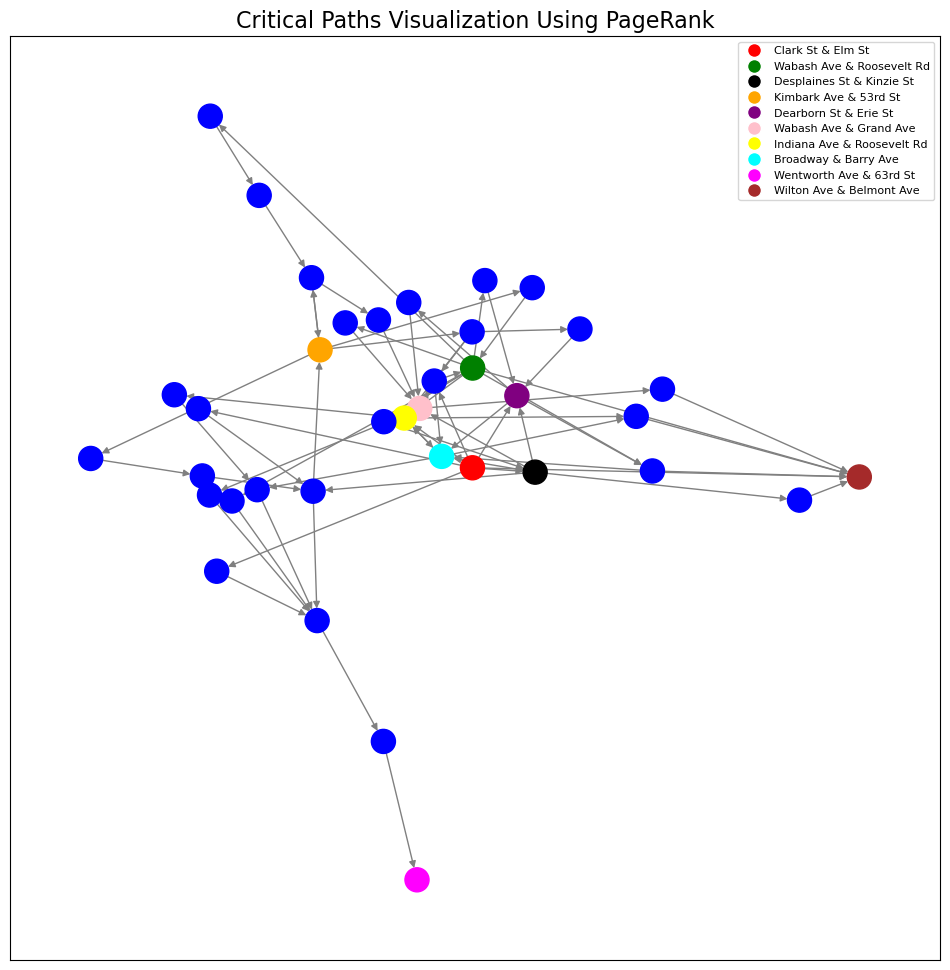

In [11]:

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
pagerank_scores = nx.pagerank(G)
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)
top_nodes = sorted_pagerank[:10]
critical_paths = {}
for i, node1 in enumerate(top_nodes):
    for node2 in top_nodes[i+1:]:
        try:
            path = nx.shortest_path(G, source=node1[0], target=node2[0], weight='weight')
            path_length = nx.shortest_path_length(G, source=node1[0], target=node2[0], weight='weight')
            critical_paths[(node1[0], node2[0])] = (path, path_length)
        except nx.NetworkXNoPath:
            critical_paths[(node1[0], node2[0])] = None

critical_paths_filtered = {k: v for k, v in critical_paths.items() if v is not None}
colors = ['red', 'green', 'black', 'orange', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'brown']
node_color_map = {top_nodes[i][0]: colors[i] for i in range(len(top_nodes))}
critical_path_graph = nx.DiGraph()

for (node1, node2), (path, _) in critical_paths_filtered.items():
    path_edges = list(zip(path[:-1], path[1:]))
    critical_path_graph.add_edges_from(path_edges)

pos = nx.spring_layout(critical_path_graph, seed=42)
plt.figure(figsize=(12, 12))
node_colors = [node_color_map[node] if node in node_color_map else 'blue' for node in critical_path_graph.nodes()]
nx.draw_networkx_nodes(
    critical_path_graph,
    pos,
    node_color=node_colors,
    node_size=300
)

nx.draw_networkx_edges(critical_path_graph, pos, edge_color='gray')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=top_nodes[i][0])
    for i in range(len(top_nodes))
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=8)
plt.title("Critical Paths Visualization Using PageRank", fontsize=16)
plt.show()
